# Emoji Prediction

Tetsumichi Umada (Telly)

#### Motivation
The project idea originally comes from [DeepMoji](https://deepmoji.mit.edu), which translate given text messages into Emojis to describe their emotions, using millions of text messages and state-of-art algorithms. For this project, we predict emotions associated texts. Nowadays, people often send a text to each other. However, it is hard for people to understand and know a sender's emotions from the text. The classifier will further help to represent emotions associated with the text messages. 

**Datasets**: The data comes from [DeepMoji GitHub repository](https://github.com/bfelbo/DeepMoji/tree/master/data). All the data is in `pickle` format. Using python2 script, we unpickle the data and save it as a`txt` file. Then, we use python3 to apply machine learning algorithms. 

<br>
The python script to extract `pickle` data is saved as `script.py`. The file name needs to be specified at the top of the script. Then, run the program with `python script.py > <filen_name>.txt` to save into a new txt file. And, each line contains text and its label, formatted with: `[<label>] <text>`. 

<br>
We use `psychExp` datasets. Each instance is associated with seven kinds of emotions: joy, fear, anger, sadness, disgust, shame, guilt. 

### Read data from the text

In [1]:
def read_file(file_name): 
    data_list  = []
    with open(file_name, 'r') as f: 
        for line in f: 
            line = line.strip() 
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data_list.append([label, text])
    return data_list 

In [2]:
# file_name = "olympic.txt"
file_name = "data/psychExp.txt"
psychExp_txt = read_file(file_name)

In [3]:
print("The number of instances: {}".format(len(psychExp_txt)))

The number of instances: 7480


In [4]:
print("Data example: ")
print(psychExp_txt[0])

Data example: 
['1. 0. 0. 0. 0. 0. 0.', 'During the period of falling in love, each time that we met and especially when we had not met for a long time.']


### Features       
From the given texts, we made ngrams with a range from 1 to 4. The feature also includes the any punctuations such as `!`, `?`, or `.`. If the data originally come form the Tweets, it contains hash tags (such as `#olympics2012` or `#olympiics`). They are kept as hashtags. 


In [5]:
import re 
from collections import Counter

In [6]:
def ngram(token, n): 
    output = []
    for i in range(n-1, len(token)): 
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram) 
    return output

In [7]:
def create_feature(text, nrange=(1, 1)):
    text_features = [] 
    text = text.lower() 

    # 1. treat alphanumeric characters as word tokens
    # Since tweets contain #, we keep it as a feature
    # Then, extract all ngram lengths
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1): 
        text_features += ngram(text_alphanum.split(), n)
    
    # 2. treat punctuations as word token
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)
    
    # 3. Return a dictinaory whose keys are the list of elements 
    # and their values are the number of times appearede in the list.
    return Counter(text_features)

In [8]:
print(create_feature("I love you!"))
print(create_feature(" aly wins the gold!!!!!!  #olympics"))
print(create_feature(" aly wins the gold!!!!!!  #olympics", (1, 2)))

Counter({'i': 1, 'love': 1, 'you': 1, '!': 1})
Counter({'aly': 1, 'wins': 1, 'the': 1, 'gold': 1, '#olympics': 1, '!!!!!!': 1, '#': 1})
Counter({'aly': 1, 'wins': 1, 'the': 1, 'gold': 1, '#olympics': 1, 'aly wins': 1, 'wins the': 1, 'the gold': 1, 'gold #olympics': 1, '!!!!!!': 1, '#': 1})


**Cnvert the lables and Add features to text data**: 

In [9]:
def convert_label(item, name): 
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)): 
        if items[idx] == 1: 
            label += name[idx] + " "
    
    return label.strip()

In [10]:
emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

X_all = []
y_all = []
for label, text in psychExp_txt:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

In [11]:
print("features example: ")
print(X_all[0])

features example: 
Counter({'time': 2, 'we': 2, 'met': 2, 'during': 1, 'the': 1, 'period': 1, 'of': 1, 'falling': 1, 'in': 1, 'love': 1, 'each': 1, 'that': 1, 'and': 1, 'especially': 1, 'when': 1, 'had': 1, 'not': 1, 'for': 1, 'a': 1, 'long': 1, 'during the': 1, 'the period': 1, 'period of': 1, 'of falling': 1, 'falling in': 1, 'in love': 1, 'love each': 1, 'each time': 1, 'time that': 1, 'that we': 1, 'we met': 1, 'met and': 1, 'and especially': 1, 'especially when': 1, 'when we': 1, 'we had': 1, 'had not': 1, 'not met': 1, 'met for': 1, 'for a': 1, 'a long': 1, 'long time': 1, 'during the period': 1, 'the period of': 1, 'period of falling': 1, 'of falling in': 1, 'falling in love': 1, 'in love each': 1, 'love each time': 1, 'each time that': 1, 'time that we': 1, 'that we met': 1, 'we met and': 1, 'met and especially': 1, 'and especially when': 1, 'especially when we': 1, 'when we had': 1, 'we had not': 1, 'had not met': 1, 'not met for': 1, 'met for a': 1, 'for a long': 1, 'a long t

In [12]:
print("Label example:")
print(y_all[0])

Label example:
joy


### Classifiers 
The following classifiers are used for this project:
+ `SVC`
+ `LinearSVC`
+ `RandomForestClassifier`
+ `DecisionTreeClassifier`


**Data split**: The data is split into 80-20 ratio where 80% for the training and 20% for the testing. We keep 20% to make sure that we have enough amount of the data for testing. We used `train_test_split` to split the data. 

In [13]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.3, random_state = 123)

In [14]:
from sklearn.metrics import accuracy_score

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
#     print("Training acc: {}".format(train_acc))
#     print("Test acc    : {}".format(test_acc))
    
    return train_acc, test_acc    

**DictVectorizer**: The above converts the labeled features into sparse vectors

In [15]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [16]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
 

# Classifiers 
#svc = SVC()
# create and configure model
svc = SVC(gamma='scale')
lsvc = LinearSVC(random_state=0,max_iter=5000)
rforest = RandomForestClassifier(random_state=0,n_estimators=100)
dtree = DecisionTreeClassifier()
model = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=0)
mnb = MultinomialNB()

clifs = [svc, lsvc, rforest, dtree, model, mnb]

# train and test them 
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

| Classifier                | Training Accuracy | Test Accuracy |
| ------------------------- | ----------------- | ------------- |
| SVC                       |         0.9119133 |     0.4612299 |
| LinearSVC                 |         0.9988116 |     0.5855615 |
| RandomForestClassifier    |         0.9988116 |     0.5681818 |
| DecisionTreeClassifier    |         0.9988116 |     0.4438503 |
| GradientBoostingClassifier |         0.5652109 |     0.5013369 |
| MultinomialNB             |         0.9864825 |     0.5655080 |


**Results**: The training and test accuracies for each classifier are summarized in the table below.


| Classifier                | Training Accuracy | Test Accuracy |
| ------------------------- | ----------------- | ------------- |
| SVC                       |         0.1458890 |     0.1410428 |
| LinearSVC                 |         0.9988302 |     0.5768717 |
| RandomForestClassifier    |         0.9911430 |     0.4304813 |
| DecisionTreeClassifier    |         0.9988302 |     0.4585561 |



By looking at the numbers, the support vector machine works good, meaning it's not overfitting and underfitting. The test accuracy is slightly higher than the other classifiers. The other classifiers are overfitting because the training accuracy is very higher than the test accuracy. 

**Model Tuning**: Since `LinearSVC` seems to be working good, we further try to tune parameters. 

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1, 2, 3, 5, 10, 15, 20, 30, 50, 70, 100], 
             'tol':[0.1, 0.01, 0.001, 0.0001, 0.00001]}

lsvc = LinearSVC(random_state=0,max_iter=10000)
grid_obj = GridSearchCV(lsvc, param_grid = parameters, cv=5)
grid_obj.fit(X_train, y_train)

print("Validation acc: {}".format(grid_obj.best_score_))
print("Training acc: {}".format(accuracy_score(y_train, grid_obj.predict(X_train))))
print("Test acc    : {}".format(accuracy_score(y_test, grid_obj.predict(X_test))))
print("Best parameter: {}".format(grid_obj.best_params_))

**Final model**: The final model for this project performs test accuracy 0.576872. Although we tried to tune to minimize the overfitting, it seems to be not working well. As we expected, the accuracy is low.... 

### Error analysis

In [19]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, grid_obj.predict(X_test))
print(matrix)

[[112  27  16  23  12  19  19]
 [ 20 113  11  11  12  17   9]
 [  9  18 157   3  11  16  10]
 [ 19  12  15 107  12  17  36]
 [  7   9   7   7 155  18   8]
 [ 17   9  17  12  21 137  10]
 [ 31  19  10  30  17  10  82]]


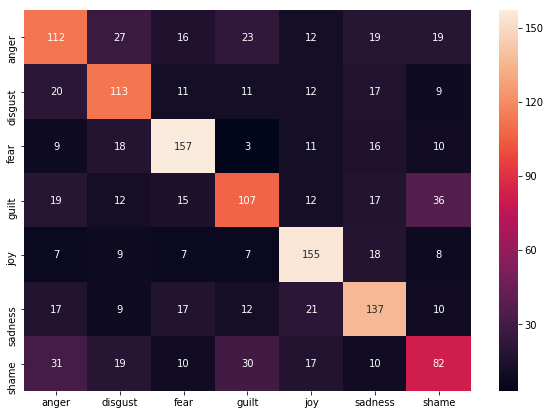

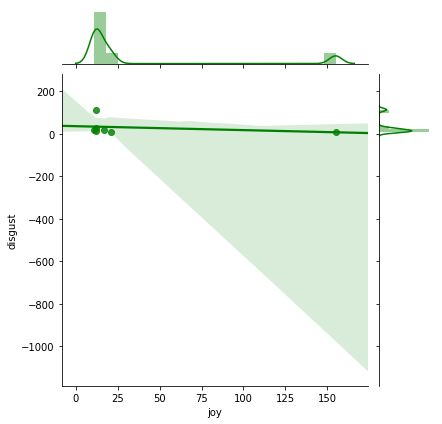

In [20]:
%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
df_cm = pd.DataFrame(matrix, index = l, columns = l)
plt.figure(figsize = (10,7))
#
sn.heatmap(df_cm, annot=True, fmt="d")

g=sn.jointplot(data=df_cm,x='joy',y='disgust',kind='reg', color='g')

plt.show()

# Reference https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

In [54]:
# Get counts for each label
label_freq = {}
for label, _ in psychExp_txt: 
    label_freq[label] = label_freq.get(label, 0) + 1

# print the labels and their counts in sorted order 
for l in sorted(label_freq, key=label_freq.get, reverse=True):
    print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))

joy       (1. 0. 0. 0. 0. 0. 0.)  1084
anger     (0. 0. 1. 0. 0. 0. 0.)  1080
sadness   (0. 0. 0. 1. 0. 0. 0.)  1079
fear      (0. 1. 0. 0. 0. 0. 0.)  1078
disgust   (0. 0. 0. 0. 1. 0. 0.)  1057
guilt     (0. 0. 0. 0. 0. 0. 1.)  1057
shame     (0. 0. 0. 0. 0. 1. 0.)  1045


By looking at the distributions of the labels, the data is distributed well. The errors probably happen because there are not enough data to train the classifier. Also, ngram with the range of 1 to 4 might not be enough or adding noise to the classifiers.

### Future Work 

To be able to accurately analyze the text, we probably need to have more data to train the classifiers. Also, it would be better to further experiment with features. (I'm not sure what we can use, but probably there is something to make features) At the same time, by adding more data with emoji, we can predict more emoji associated with the texts. 

<br> 
For the future work, we want to have more data and more emoji to analyze and represent the sentiment of the texts. 


### For fun

In [21]:
emoji_dict = {"joy":"😂", "fear":"😱", "anger":"😠", "sadness":"😢", "disgust":"😒", "shame":"😳", "guilt":"😳"}

In [22]:
t1 = "Thank you for dinner!"
t2 = "I don't like it"
t3 = "My car skidded on the wet street"
t4 = "My cat died"
t5 = "I am not well"
t6 = "I love cat"
t7 = "Today is hot!"
t8 = "Great Morning."
t9 = "I love ice-cream"
t10= "Delhi weather is too hot!I can't survive"
t11= "How was the day?"
t12= "I am fine.How are you?"
t13= "Its too cold How i can survive"
t14="\U0001f600"
import emoji

texts = [t1, t2, t3, t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14]
for text in texts: 
    features = create_feature(text, nrange=(1, 14))
    features = vectorizer.transform(features)
    prediction = grid_obj.predict(features)[0]
    print("{} {}".format(emoji_dict[prediction], text))
    print(emoji.demojize("{} {}".format(emoji_dict[prediction],text)))

😂 Thank you for dinner!
:face_with_tears_of_joy: Thank you for dinner!
😢 I don't like it
:crying_face: I don't like it
😱 My car skidded on the wet street
:face_screaming_in_fear: My car skidded on the wet street
😢 My cat died
:crying_face: My cat died
😳 I am not well
:flushed_face: I am not well
😂 I love cat
:face_with_tears_of_joy: I love cat
😒 Today is hot!
:unamused_face: Today is hot!
😳 Great Morning.
:flushed_face: Great Morning.
😂 I love ice-cream
:face_with_tears_of_joy: I love ice-cream
😳 Delhi weather is too hot!I can't survive
:flushed_face: Delhi weather is too hot!I can't survive
😳 How was the day?
:flushed_face: How was the day?
😂 I am fine.How are you?
:face_with_tears_of_joy: I am fine.How are you?
😳 Its too cold How i can survive
:flushed_face: Its too cold How i can survive
😳 😀
:flushed_face: :grinning_face:


### Reference 
+ [DeepMoji](https://www.media.mit.edu/projects/deepmoji/overview/)
+ [DeepMoji GitHub](https://github.com/bfelbo/DeepMoji)
+ [Multiclass and multilabel algorithms](http://scikit-learn.org/stable/modules/multiclass.html)
+ [sklearn.svm.SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
+ [sklearn.svm.LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
+ [sklearn.ensemble.RandomForestClassifie](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
+ [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
